In [1]:
import os
import numpy as np
from parse import parse
import matplotlib.pyplot as plt

## Read true data

In [2]:
mapfile = os.path.join('..', 'Documentation', 'Maps', 'TrueMap1')
truemap = []
with open(mapfile, 'r') as f:
    for _ in range(5):
        f.readline()
    for l in f:
        l = " ".join(l)
        l = l.replace('.', '0')
        l = l.replace('#', '63')
        l = l.replace('/', '0')
        l = l.replace('-', '0')
        l = l.replace('|', '0')
        l = l.replace('\\', '0')
        truemap.append(np.array(l.split(), dtype=np.int32))
truemap = np.array(truemap)
truemap = np.rot90(truemap, 3)
truemap = np.flipud(truemap)
truemap
# truemap

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 63, 63,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 63, 63,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 63, 63,
        63, 63, 63,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 63, 63,
        63, 63, 63,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 63, 63,
        63, 63, 63,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 

## Read data in

In [39]:
datapath = os.path.join('..', 'data')
datafolders = os.listdir(datapath)
datafolders

['expr1-Belief_Human_Readable-2019-04-18_15-47',
 'expr1-Belief_Human_Readable-2019-04-18_15-53',
 'expr1-Belief_Human_Readable-2019-04-18_16-07',
 'expr1-Belief_Human_Readable-2019-04-18_16-15',
 'expr1-Belief_Human_Readable-2019-04-18_16-20',
 'expr1-Belief_Human_Readable-2019-04-18_17-26',
 'expr1-Non_Belief-2019-04-18_16-32',
 'expr1-Non_Belief-2019-04-18_16-37',
 'expr1-Non_Belief-2019-04-18_16-50',
 'expr1-Non_Belief-2019-04-18_17-11',
 'expr1-Non_Belief-2019-04-18_17-16']

In [55]:

currdatapath = os.path.join(datapath, datafolders[4]) # <- just read in one set
datafiles = os.listdir(currdatapath)
mapfile = os.path.join(currdatapath, 'map.map')

times = []
mapstime = []
with open(mapfile, 'r') as file:
    for line in file:
        if 'Map' in line:
            mapname, h, m, s = parse('{}-{}-{}-{}', line)
            if mapname == 'HumanMap':
                continue
            times.append((h , m, s))
            readsuccess = True
            mp = []
            for i in range(25):
                matline = file.readline()
                matline = matline.replace('!', '-')
                try:
                    mp.append(np.array(matline.split(), dtype=np.int32))
                except ValueError:
                    readsuccess = False
            if readsuccess:
                mp = np.array(mp)
                mapstime.append(mp)
mapstime = np.array(mapstime)[1:]

In [57]:
mapstime.shape
mapstime[-1]

array([[-31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31,
        -31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31],
       [-31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31,
        -31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31],
       [-31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31,
        -31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31],
       [-31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31,
        -31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31],
       [-31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31,
        -31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31],
       [-31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31,
        -31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31],
       [-31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31,  40,
        -31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31, -31],
      

## Plot the maps

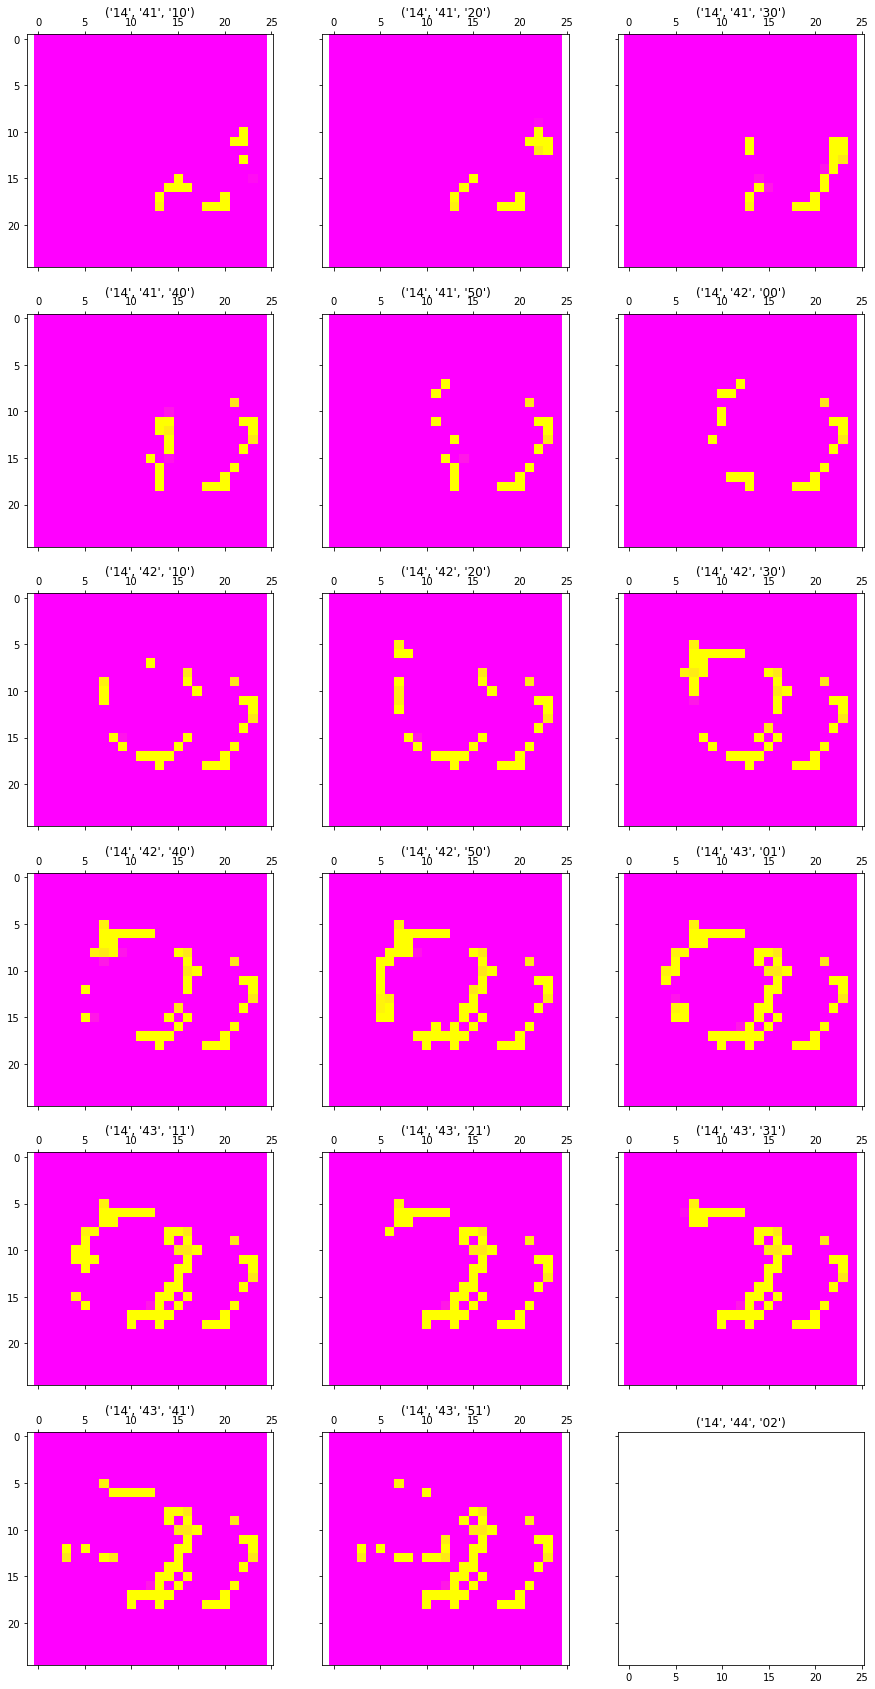

In [6]:
mapp = mapstime.copy()
mapp[mapp < 0] = 0
mapp[mapp >= 100] -= 100
fig, ax = plt.subplots(6,3 , sharex='col', sharey='row', figsize=(15, 30))
for i in range(6):
    for j in range(3):
        try:
            ax[i, j].set_title(str(times[i*3 + j]))
            ax[i, j].matshow(mapp[i*3 + j], cmap='spring', interpolation='none')
        except IndexError:
            continue
plt.show()

## Compute Metrics

### Coverage

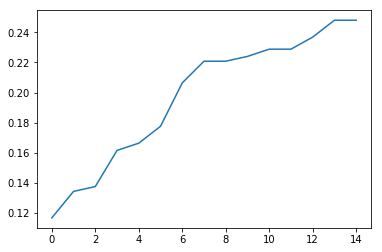

In [58]:
def coverage(mapstime):
    tmp = mapstime.copy()
    res = []
    for tmp in mapstime.copy():
        map_size = tmp.size
        covered = tmp[tmp >= 0].shape[0]
        res.append(covered/map_size)
    return np.array(res)
plt.figure()
plt.plot(coverage(mapstime))
plt.show()


### Coverage Accuracy on Visible locations

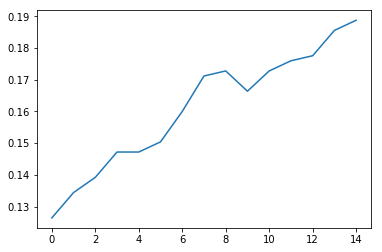

In [65]:
def coverage_accuracy(mapstime, truemap):
    tmp = mapstime.copy()
    res = []
    for tmp in mapstime:
        tmp[tmp > 100] -= 100
        seen_locs = np.where(tmp >= 0)
        diff = tmp[seen_locs] - truemap[seen_locs]
        rmse = np.sqrt(np.mean(diff * diff)) / 63
        res.append(rmse)
    return np.array(res)

def coverage_accuracy_threshold(mapstime, thresh, truemap):
    tmp = mapstime.copy()
    res = []
    for tmp in mapstime:
        tmp[tmp > 100] -= 100
        seen_locs = np.where(tmp>= 0)
        
        seen_map_size = tmp[tmp>=0].shape[0]

        tmp[tmp >= thresh] = 63
        tmp[tmp < thresh] = 0
        diff = tmp[seen_locs] - truemap[seen_locs]
        cnt = np.count_nonzero(diff)
        res.append(cnt/seen_map_size)
    return np.array(res)


plt.figure()
plt.plot(coverage_accuracy_threshold(mapstime, 48, truemap))
plt.show()

# Bulk Analyse Data

In [66]:
os.listdir(datapath)

['expr1-Belief_Human_Readable-2019-04-18_15-47',
 'expr1-Belief_Human_Readable-2019-04-18_15-53',
 'expr1-Belief_Human_Readable-2019-04-18_16-07',
 'expr1-Belief_Human_Readable-2019-04-18_16-15',
 'expr1-Belief_Human_Readable-2019-04-18_16-20',
 'expr1-Belief_Human_Readable-2019-04-18_17-26',
 'expr1-Non_Belief-2019-04-18_16-32',
 'expr1-Non_Belief-2019-04-18_16-37',
 'expr1-Non_Belief-2019-04-18_16-50',
 'expr1-Non_Belief-2019-04-18_17-11',
 'expr1-Non_Belief-2019-04-18_17-16']

In [67]:
def readInMap(mapfile):
    times = []
    mapstime = []
    with open(mapfile, 'r') as file:
        for line in file:
            if 'Map' in line:
                mapname, h, m, s = parse('{}-{}-{}-{}', line)
                times.append((h , m, s))
                if mapname == 'HumanMap':
                    readsuccess = True
                    mp = []
                    for i in range(25):
                        matline = file.readline()
                        matline = matline.replace('.', '0').replace('O','63').replace('*', '0').replace('L', '0')
                        matline = matline.split()
                        if len(matline) == 25:
                            matline = np.array(matline, dtype=np.int32)
                            mp.append(matline)
                        else:
                            readsuccess = False
                    mp = np.array(mp)
                    if readsuccess:
                        mapstime.append(mp)
                else:
                    readsuccess = True
                    mp = []
                    for i in range(25):
                        matline = file.readline()
                        matline = matline.replace('!', '-').replace('\\x0','')
                        matline = matline.split()
                        if len(matline) == 25:
                            try:
                                matline = np.array(matline, dtype=np.int32)
                            except:
                                mt = []
                                for m in matline:
                                    try:
                                        np.array(m, dtype=np.int32)
                                        mt.append(m)
                                    except:
                                        mt.append(-31)
                                matline = np.array(mt, dtype=np.int32)
                            
                            mp.append(matline)
                        else:
                            readsuccess = False
                    mp = np.array(mp)
                    if readsuccess:
                        mapstime.append(mp)
    return np.array(mapstime)
    

def calculateMetricOneSet(datapath, datafoldername, truemap):
    currdatapath = os.path.join(datapath, datafoldername) # <- just read in one set
    datafiles = os.listdir(currdatapath)
    mapfile = os.path.join(currdatapath, 'map.map')
    mapstime = readInMap(mapfile)
    cov = coverage(mapstime)[-1]
    rmse = coverage_accuracy(mapstime, truemap)[-1]
    
    res = []
    for t in range(1, 63):
        thr = coverage_accuracy_threshold(mapstime, t, truemap)[-1]
        res.append(thr)
#     plt.plot(res)
#     plt.show()
    
    return (cov, rmse, np.max(res))

# calculateMetricOneSet(datapath, os.listdir(datapath)[10], truemap)

In [68]:
def calculateMetrics(datapath, dataset_tag, truemap):
    dirs = [d for d in os.listdir(datapath) if dataset_tag in d]
    covs = []
    accs = []
    thres = []
    for d in dirs:
        c, a, t = calculateMetricOneSet(datapath, d, truemap)
        covs.append(c)
        accs.append(a)
        thres.append(t)
    mean_covs = np.mean(covs)
    mean_accs = np.mean(accs)
    mean_thres = np.mean(thres)
    return(mean_covs, mean_accs, mean_thres)

In [69]:
print(calculateMetrics(datapath, 'Human_Readable',truemap))
print(calculateMetrics(datapath, 'Non_Belief',truemap))

(0.25066666666666665, 0.8333859403481173, 0.7502510652164588)
(1.0, 0.4087584556838112, 0.168)


# Plotting a route
For Belief Map Run

In [70]:
from scipy.interpolate import RegularGridInterpolator

resized_truemapp = np.zeros((1800, 1800))
stride_x = int(1800/25)
for i in range(25):
    for j in range(25):
        resized_truemapp[i*stride_x:(i+1)*stride_x, j*stride_x:(j+1)*stride_x] = truemap[i, j]
        
# resized_truemapp = np.transpose(resized_truemapp)
        

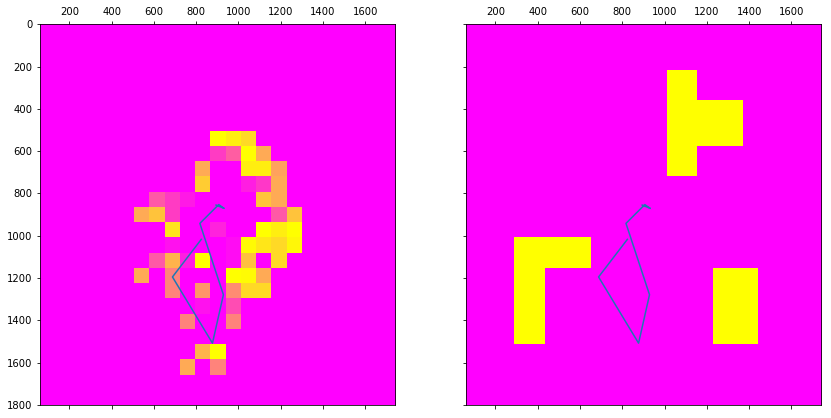

In [71]:
datafoldername = os.listdir(datapath)[2] # <- The file that includes the pose values
currdatapath = os.path.join(datapath, datafoldername) # <- just read in one set
datafiles = os.listdir(currdatapath)
datfile = os.path.join(currdatapath, 'dat.data')

positions = []
with open(datfile) as f:
    for line in f:
        if 'Pose' in line:
            x, y, h = parse('Pose: X: {} Y: {} H: {}', line)
            positions.append(np.array([x, y, h], dtype=np.float32))
positions = np.array(positions)
positions.shape

mapstime = readInMap(os.path.join(currdatapath, 'map.map'))
mapp = mapstime[-1]
mapp[mapp < 0] = 0
mapp[mapp >= 100] -= 100

newmapp = np.zeros((1800, 1800))
stride_x = int(1800/25)
for i in range(25):
    for j in range(25):
        newmapp[i*stride_x:(i+1)*stride_x, j*stride_x:(j+1)*stride_x] = mapp[i, j]
        

fig, ax = plt.subplots(1, 2 , sharex='col', sharey='row', figsize=(14, 7))
ax[0].matshow(newmapp, cmap='spring', interpolation='none')
ax[0].plot(positions[:, 0], positions[:, 1])
ax[1].matshow(resized_truemapp, cmap='spring', interpolation='none')
ax[1].plot(positions[:, 0], positions[:, 1])
plt.show()

For Non-Belief map run

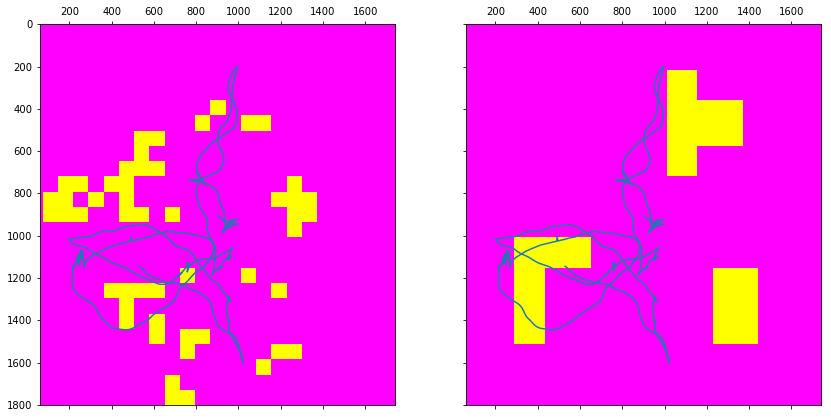

In [72]:
datafoldername = os.listdir(datapath)[10] # <- The file that includes the pose values
currdatapath = os.path.join(datapath, datafoldername) # <- just read in one set
datafiles = os.listdir(currdatapath)
datfile = os.path.join(currdatapath, 'dat.data')

positions = []
with open(datfile) as f:
    for line in f:
        if 'Pose' in line:
            x, y, h = parse('Pose: X: {} Y: {} H: {}', line)
            positions.append(np.array([x, y, h], dtype=np.float32))
positions = np.array(positions)
positions.shape

mapstime = readInMap(os.path.join(currdatapath, 'map.map'))
mapp = mapstime[-1]
mapp[mapp < 0] = 0
mapp[mapp >= 100] -= 100

newmapp = np.zeros((1800, 1800))
stride_x = int(1800/25)
for i in range(25):
    for j in range(25):
        newmapp[i*stride_x:(i+1)*stride_x, j*stride_x:(j+1)*stride_x] = mapp[i, j]
        

fig, ax = plt.subplots(1, 2 , sharex='col', sharey='row', figsize=(14, 7))
ax[0].matshow(newmapp, cmap='spring', interpolation='none')
ax[0].plot(positions[:, 0], positions[:, 1])
ax[1].matshow(resized_truemapp, cmap='spring', interpolation='none')
ax[1].plot(positions[:, 0], positions[:, 1])
plt.show()

Check New Data

In [77]:
list(enumerate(os.listdir(datapath)))

[(0, 'expr1-Belief_Human_Readable-2019-04-18_15-47'),
 (1, 'expr1-Belief_Human_Readable-2019-04-18_15-53'),
 (2, 'expr1-Belief_Human_Readable-2019-04-18_16-07'),
 (3, 'expr1-Belief_Human_Readable-2019-04-18_16-15'),
 (4, 'expr1-Belief_Human_Readable-2019-04-18_16-20'),
 (5, 'expr1-Belief_Human_Readable-2019-04-18_17-26'),
 (6, 'expr1-Belief_Random_Walk_2-2019-04-28_11-43'),
 (7, 'expr1-Belief_Random_Walk_2-2019-04-28_11-45'),
 (8, 'expr1-Non_Belief-2019-04-18_16-32'),
 (9, 'expr1-Non_Belief-2019-04-18_16-37'),
 (10, 'expr1-Non_Belief-2019-04-18_16-50'),
 (11, 'expr1-Non_Belief-2019-04-18_17-11'),
 (12, 'expr1-Non_Belief-2019-04-18_17-16'),
 (13, 'testing')]

In [ ]:
datafoldername = os.listdir(datapath)[7] # <- The file that includes the pose values
print(datafoldername)
currdatapath = os.path.join(datapath, datafoldername) # <- just read in one set
datafiles = os.listdir(currdatapath)
datfile = os.path.join(currdatapath, 'dat.data')

positions = []
with open(datfile) as f:
    for line in f:
        if 'Pose' in line:
            try:
                x, y, h = parse('Pose: X: {} Y: {} H: {}', line)
                positions.append(np.array([x, y, h], dtype=np.float32))
            except Exception as e:
                print(e)
                print(line)
positions = np.array(positions)
positions.shape

mapstime = readInMap(os.path.join(currdatapath, 'map.map'))
mapp = mapstime[-1].copy()
mapp[mapp >= 100] -= 100
mapp[mapp >= 0] += 20
mapp[mapp < 0] = 0

# mapp[mapp >= 31] = 64
# mapp[mapp < 32] = 0

newmapp = np.zeros((1800, 1800))
stride_x = int(1800/25)
for i in range(25):
    for j in range(25):
        newmapp[i*stride_x:(i+1)*stride_x, j*stride_x:(j+1)*stride_x] = mapp[i, j]


copy2 = mapstime.copy()
copy2[copy2 >= 100] -= 100
print(calculateMetricOneSet(datapath, datafoldername, truemap))
 
res = []
for t in range(1, 64):
    v = coverage_accuracy_threshold(copy2, t, truemap)[-2]
    res.append(v)
plt.plot(range(1, 64), res)
plt.show()


fig, ax = plt.subplots(1, 2 , sharex='col', sharey='row', figsize=(14, 7))
ax[0].matshow(newmapp, cmap='gist_gray', interpolation='none')
ax[0].plot(positions[:, 0], positions[:, 1])
ax[1].matshow(resized_truemapp, cmap='gist_gray', interpolation='none')
ax[1].plot(positions[:, 0], positions[:, 1])
plt.show()

expr1-Belief_Random_Walk_2-2019-04-28_11-45
(0.328, 0.8547176082049786, 0.47317073170731705)
